# Decision Tree Regression

참고: XGBoost와 사이킷런을 활용한 그레이디언트 부스팅 (한빛미디어, 2022)

* 결정 트리는 가지(branch) 분할을 통해 데이터를 두 개의 노드(node)로 나눔
* 가지 분할은 예측을 만드는 리프 노드(leaf node)까지 계속됨

### 1. 필요한 Python 라이브러리 Import 하기

In [1]:
# 판다스와 넘파이를 임포트합니다.
import pandas as pd
import numpy as np

# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split
# 사이킷런 모델 셀렉션에서 train_test_split만 가져와서 사용하겠다.

# DecisionTreeRegressor를 임포트합니다.
from sklearn.tree import DecisionTreeRegressor

# cross_val_score를 임포트합니다.
from sklearn.model_selection import cross_val_score

from sklearn import tree
import matplotlib.pyplot as plt

# 경고를 끕니다.
import warnings

warnings.filterwarnings("ignore")

### 2. 자전거 대여 데이터 읽기

In [4]:
# bike_rentals_cleaned 데이터셋을 로드합니다.
df_bikes = pd.read_csv("bike_rentals_cleaned.csv")
df_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [5]:
# describe()를 활용한 통계특성 확인하기
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.682627,1.395349,0.495423,0.474391,0.627908,0.190411,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465773,0.544894,0.183023,0.162938,0.142074,0.077462,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180971,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.729791,0.233206,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [6]:
# 데이터를 X와 y로 나눕니다.
X_bikes = df_bikes.iloc[:, :-1]
X_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754


In [7]:
y_bikes = df_bikes.iloc[:, -1]
y_bikes

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

### 3. DecisionTreeRegressor를 활용한 K-폴드 교차검증 시행

In [8]:
# DecisionTreeRegressor 객체를 만듭니다.
reg = DecisionTreeRegressor(random_state=2)
# random_state의 의미는 샘플링을 할때 어느정도로 샘플링하는지 결정하는데
# 샘플값을 지정해두면 고정된 샘플값을 가져오게 된다.
# 수치를 지정하지 않으면, 계속 값이 변하게 됨에 따라 결과가 바뀌게 된다.
reg

DecisionTreeRegressor(random_state=2)

In [ ]:
# 주피터에서는 궁금한 함수에 관하여 함수명? 으로 코드 작성하면 변수를 알려준다.(이건 클라우드 쥬피터 환경에서 말한것)
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [10]:
# 평균 제곱 오차로 교차 검증 점수를 계산합니다. CV=5는 전체 데이터를 5개영역으로 구분하여 교차검증 시행
scores = cross_val_score(reg, X_bikes, y_bikes, scoring="neg_mean_squared_error", cv=5)
scores

array([-1568188.30612245,  -544181.64383562, -2488944.17808219,
       -1304270.75342466, -2123235.61643836])

### 4. K-폴드 교차검증의 결과 RMSE 산정

In [11]:
# 제곱근을 계산합니다.
rmse = np.sqrt(-scores)
rmse

array([1252.27325537,  737.68668406, 1577.63879836, 1142.04673872,
       1457.13266947])

In [12]:
# 5번 교차검증한 RMSE의 평균을 출력합니다.
print("RMSE 평균: %0.2f" % (rmse.mean()))

RMSE 평균: 1233.36


### 5. 모델 개발 및 성능 검증

In [13]:
# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [40]:
# DecisionTreeRegressor를 훈련 세트에서 훈련하고 점수를 계산합니다.
reg = DecisionTreeRegressor(max_depth=6,min_samples_leaf=2) # 원하는 값을 여기에 작성한다.
# max_depth는 트리의 최대 깊이를 지정합니다. 즉, 트리의 최대 깊이를 5로 설정한다는 의미이다.
# min_samples_leaf는 리프노드에 있어야 하는 최소 샘플 수를 지정합니다.
# 리프노드는 자식 노드가 없는 노드를 의미한다. 즉, 제일 끝단에 결정된 값으로 그 결정된 값에 최소 7개의 데이터가 들어가야 한다는 함수
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

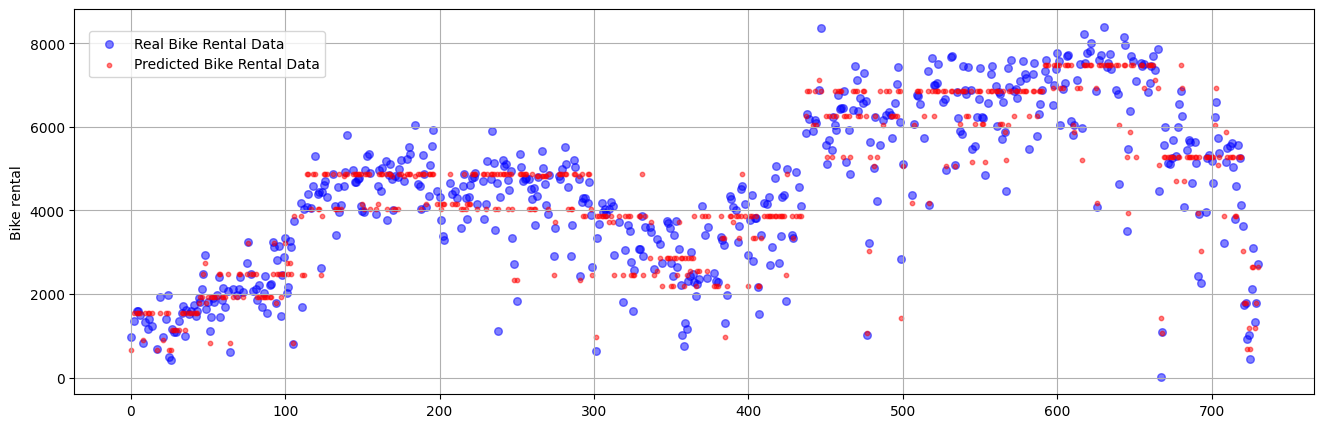

In [41]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot()
# 시계열 데이터는 line 그래프를 사용하며, 그 외의 경우 scatter 그래프를 사용하여 시각화하는게 보편적이다.
ax.scatter(
    X_train.index, y_train, label="Real Bike Rental Data", s=30, c="b", alpha=0.5
)
ax.scatter(
    X_train.index, y_pred, label="Predicted Bike Rental Data", s=10, c="r", alpha=0.5
)
ax.set_ylabel("Bike rental")
ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.85))

# 이런식으로 모든 값이 정확도가 높다면, 훈련데이터에만 적합한 오버피팅되어 있는 현상이다.

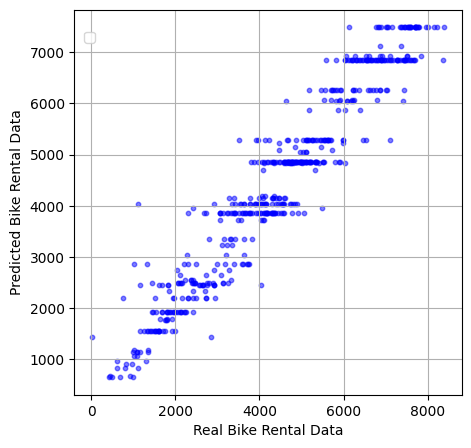

In [42]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(y_train, y_pred, s=10, c="b", alpha=0.5)
ax.set_xlabel("Real Bike Rental Data")
ax.set_ylabel("Predicted Bike Rental Data")
ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.85))
# 훈련 데이터와 예측한 데이터의 분포를 비교하는데 1차 함수 정도면 일반화가 안되어 있다.

In [ ]:
# DecisionTreeRegressor를 훈련 세트에서 훈련하고 점수를 계산합니다.
# 위의 그래프를 보면 모든 데이터 포인트를 완벽하게 맞추고 있음
# RMSE는 0에 가까운 값이 나옴 = 모든 데이터 포인트를 맞추고 있다는 것으로 과적합되어 있다.
# 위의 교차검증 결과 RMSE=1233.36과 비교시 과적합되었다고 볼 수 있음
from sklearn.metrics import mean_squared_error

reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

np.float64(0.0)

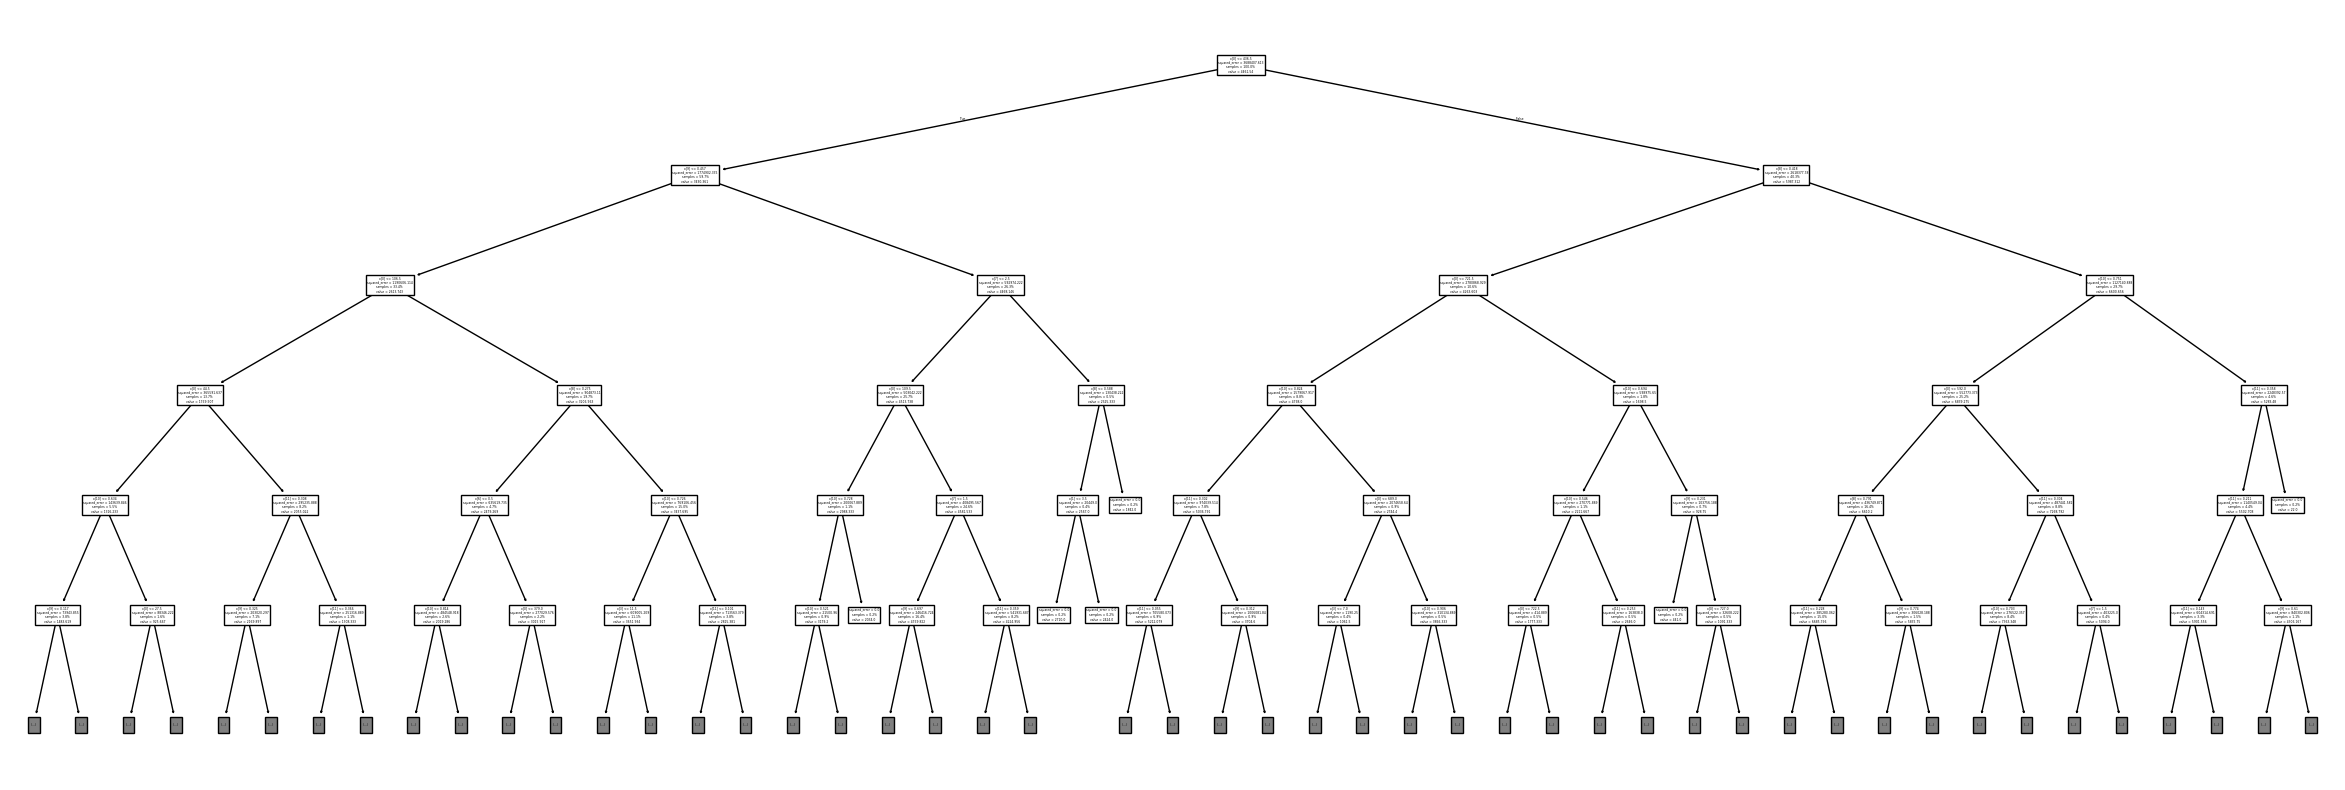

In [21]:
# DecisionTreeRegressor의 가지분류에 대한 시각화
plt.figure(figsize=(30, 10))
tree.plot_tree(reg, proportion=True, max_depth=5)
plt.show()

### 6. 하이퍼파라미터 튜닝을 통한 과적합 해결: GridSearchCV

In [22]:
# GridSearchCV를 임포트합니다.
from sklearn.model_selection import GridSearchCV

# max_depth 매개변수를 선택합니다.
# max_depth는 트리의 깊이를 조절하는 매개변수로, 깊이가 깊을수록 모델이 복잡해짐 - 과적합의 원인
# max_depth를 조절하여 과적합을 방지할 수 있음
params = {"max_depth": [None, 2, 3, 4, 6, 8, 10, 20]}

# 회귀 모델을 만듭니다.
reg = DecisionTreeRegressor(random_state=2)

# GridSearchCV 객체를 초기화합니다.
grid_reg = GridSearchCV(
    reg,
    params,
    scoring="neg_mean_squared_error",
    cv=5, # 교차검증을 5번 시행
    return_train_score=True, # 훈련 점수도 반환하도록 설정
    n_jobs=-1, # 모든 CPU 코어를 사용하도록 설정(보통 -1로 설정하여 사용한다.)
)

# X_train와 y_train로 그리드 서치를 수행합니다.
grid_reg.fit(X_train, y_train)

# 최상의 매개변수를 추출합니다.
best_params = grid_reg.best_params_

# 최상의 매개변수를 출력합니다.
print("최상의 매개변수:", best_params)

최상의 매개변수: {'max_depth': 6}


In [23]:
grid_reg.cv_results_["mean_test_score"]

array([ -951325.72296914, -1400406.73531469, -1076310.81476579,
        -986779.39577675,  -905159.01229018,  -944576.70139738,
        -990739.33252026,  -953972.57387823])

In [24]:
# 최상의 점수를 계산합니다.
best_score = np.sqrt(-grid_reg.best_score_)

# 최상의 점수를 출력합니다.
print("훈련 점수: {:.3f}".format(best_score))

훈련 점수: 951.398


In [26]:
# 최상의 모델을 추출합니다.
best_model = grid_reg.best_estimator_

# 테스트 세트에서 예측을 만듭니다.
y_pred = best_model.predict(X_test)

# mean_squared_error를 임포트합니다.
from sklearn.metrics import mean_squared_error

# 테스트 세트의 제곱근 오차를 계산합니다.
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5

# 테스트 세트 점수를 출력합니다.
print("테스트 점수: {:.3f}".format(rmse_test))

테스트 점수: 864.670


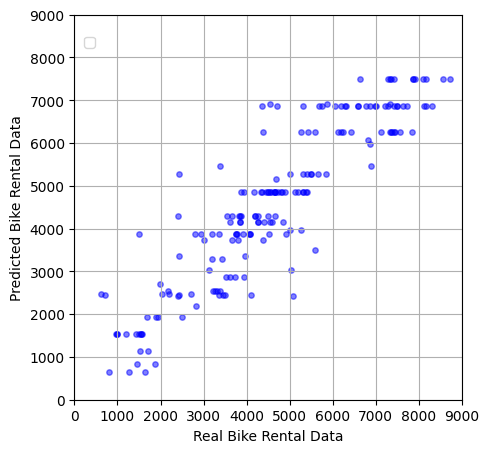

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(y_test, y_pred, s=15, c="b", alpha=0.5)
ax.set_xlabel("Real Bike Rental Data")
ax.set_ylabel("Predicted Bike Rental Data")
ax.set_xlim([0, 9000])
ax.set_ylim([0, 9000])
ax.grid()
fig.legend(loc="upper left", bbox_to_anchor=(0.13, 0.85))
# 아까 처럼 선이 아닌 분포형으로 표현되는 것이 경향이 맞고 예측을 하는데 도움이 된다.

### 7. 하이퍼파라미터 튜닝(min_samples_leaf)을 통한 과적합 해결: GridSearchCV

In [29]:
# grid_search 함수를 만듭니다.
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # GridSearchCV 객체를 만듭니다.
    grid_reg = GridSearchCV(
        reg, params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1
    )

    # X_train와 y_train에서 그리드 서치를 수행합니다.
    grid_reg.fit(X_train, y_train)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)

    # 최상의 점수를 계산합니다.
    best_score = np.sqrt(-grid_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("훈련 점수: {:.3f}".format(best_score))

    # 테스트 세트에 대한 예측을 만듭니다.
    y_pred = grid_reg.predict(X_test)

    # 평균 제곱근 오차를 계산합니다.
    rmse_test = mean_squared_error(y_test, y_pred) ** 0.5

    # 테스트 세트 점수를 출력합니다.
    print("테스트 점수: {:.3f}".format(rmse_test))

In [33]:
grid_search(params={"min_samples_leaf": [1, 2, 4, 6, 8, 10, 20, 30]})

# min_samples_leaf 는 리프 노드(leaf node) 가 되기 위해 필요한 최소 샘플 수를 의미해.

최상의 매개변수: {'min_samples_leaf': 8}
훈련 점수: 896.083
테스트 점수: 855.620


In [39]:
grid_search(
    params={
        'max_depth': list(range(1, 21)),             
        'min_samples_leaf': list(range(1, 11))
    }
)

# 훈련점수 : 특정대상에 대한 훈련값이 잘 맞는가?
# 테스트점수 : 훈련한 모델이 다른 데이터에 대해서도 잘 맞는가?
# 훈련점수와 테스트 점수가 비슷하면 일반화가 잘 된 것이고, 
# 훈련점수는 높고 테스트 점수가 낮으면 과적합된 것
# 훈련점수와 테스트 점수가 모두 낮으면 과소적합된 것

최상의 매개변수: {'max_depth': 6, 'min_samples_leaf': 2}
훈련 점수: 870.396
테스트 점수: 913.000


In [32]:
grid_search(params={"max_depth": [6, 7, 8, 9, 10], "min_samples_leaf": [3, 5, 7, 9]})

최상의 매개변수: {'max_depth': 9, 'min_samples_leaf': 7}
훈련 점수: 888.905
테스트 점수: 878.538
